In [1]:
from appyter import magic 
magic.init(lambda _= globals: _())

In [2]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import pandas as pd
import umap
from pycombat import Combat
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def quantile_normalize(df: pd.DataFrame) -> pd.DataFrame:
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_sorted = pd.DataFrame(np.sort(df.values, axis=0),
                             index=df.index,
                             columns=df.columns)
    df_mean = df_sorted.mean(axis=1)
    df_sorted = 0
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn = df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return(df_qn)

In [3]:
%%appyter hide_code

{% do SectionField(name='section0', 
                   title='Table of Contents',
                   subtitle='This is an appyter that can visualize the relationship between age and gene expression. Begin by first typing in the gene in the input field below. Then you can customize what colors you would like for the plots. You can also choose which plots you would like to download',
                   img='toc.svg'
)%}

{% do SectionField(name='section1',
                   title='Input Gene',
                   subtitle='Input the name of the gene that you would like to view',
                   img = 'gene.svg'
)%}

{% do SectionField(name='section2',
                  title='Model Colors',
                   subtitle='Select the color you would like to view for your graphs',
                   img = 'graph.svg'
)%}

{% do SectionField(name='section4',
                   title ='Select Plots to Include',
                   subtitle='Select which of the plots tha you would like to include',
                   img = 'onoff.svg'
                   
)%}

{% do SectionField(name='section3',
                   title ='Download Figures',
                   subtitle = 'Select which figures you would like to download',
                   img = 'download.svg'
)%}


In [4]:
%%appyter code_exec

GENE_INPUT = {{ StringField(
                name = 'GENE_STRING',
                label = 'Gene String',
                default = 'mlxip',
                section = 'section1'
)}}

```python

GENE_INPUT = 'mlxip'
```

In [5]:
%%appyter code_exec
GRAPH_COLOR =  {{
    ChoiceField(name='Graph Colors',
             label='Choose the color schema of the Graphs',
             default = 'viridis',
             choices={'viridis':'1', 'plasma':'2'},
             section='section2'
            ) }}

```python

GRAPH_COLOR =  1
```

In [6]:
%%appyter code_exec
INCLUDE_PCA = {{
    BoolField(name='INCLUDE_PCA',
             label='Include PCA plot?',
             default = False,
             section ='section4'
    
             )}}


INCLUDE_UMAP = {{
    BoolField(name='INCLUDE_UMAP',
             label='Include UMAP plot?',
             default = False,
             section = 'section4'
    
             )}}

INCLUDE_TSNE = {{
    BoolField(name='INCLUDE_TSNE',
             label='Include TSNE plot?',
             default = False,
             section = 'section4'
    
             )}}


INCLUDE_COMBAT = {{
    BoolField(name='INCLUDE_COMBAT',
             label='Include Combat plot?',
             default = False,
             section = 'section4'
    
             )}}

```python
INCLUDE_PCA = False
INCLUDE_UMAP = False
INCLUDE_TSNE = False
INCLUDE_COMBAT = False
```

In [7]:
%%appyter code_exec
DOWNLOAD_PLOT = {{
    BoolField(name='DOWNLOAD_PLOT',
              label='Download the gene plot?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_PCA = {{
    BoolField(name='DOWNLOAD_PCA',
              label='Download PCA?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_TSNE = {{
    BoolField(name='DOWNLOAD_TSNE',
              label='Download t-SNE?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_UMAP = {{
    BoolField(name='DOWNLOAD_UMAP',
              label='Download UMAP?',
              default = False,
              section = 'section3'
             )
}}

DOWNLOAD_COMBAT_DATA = {{
    BoolField(name='DOWNLOAD_COMBAT_DATA',
              label='Download Combat Plot?',
              default = False,
              section = 'section3'
             )
}}

```python
DOWNLOAD_PLOT = False
DOWNLOAD_PCA = False
DOWNLOAD_TSNE = False
DOWNLOAD_UMAP = False
DOWNLOAD_COMBAT_DATA = False
```

In [8]:
SIGNIFICANT_M_GENES = ['tff2','ugt1a6b','2210407c18rik','saa3',
 'g530012d18rik','retnlb','clec4b1','gm14935','gm38019',
 'agpat2','orm1','cyp2c68','hsd17b6','gm27157',
 'klra13-ps', 'itih1','adtrp','proc','klrc2',
 'olfr1029','gpr39',
 'ces1c',
 'mup10',
 'mgst1',
 'rp24-211l21.1',
 'urad',
 '9030619p08rik',
 'wfdc21',
 'oog1',
 'mettl7b',
 'mup13',
 'olfr1034',
 'myl7',
 'rab17',
 'gm11567',
 'cyp3a44',
 'apoc2',
 'ugt2b1',
 'krt8-ps',
 'ifitm2',
 'plac8',
 'aadac',
 'phgr1',
 'agxt',
 'esrp2',
 'cyp2d9',
 'kcne3',
 'cyp4a32',
 'gm12608',
 'krt79',
 'gm15368',
 'tinag',
 'akr1c19',
 '2010003k11rik',
 'vnn1',
 'otc',
 'sult1b1',
 'pnpla5',
 'fam162b',
 'gm9515',
 'foxa2',
 'ppp1r14d',
 'krtap3-1',
 'ces1d',
 'ugt1a8',
 'cyp2d10',
 'gm4788',
 'gm15077',
 'gm933',
 'mogat2',
 'gnat3',
 'alppl2',
 'cyp2c53-ps',
 'gm13655',
 'slc17a1',
 'slc22a27',
 'gimd1',
 'defb40',
 'cyp2b9',
 'cyp2d11',
 'sult1d1',
 'gm3470',
 'gsta2',
 'rhbg',
 'gm13550',
 'gsta1',
 'entpd8',
 'prss8',
 'krt84',
 'gm9458',
 'tmem171',
 'spink5',
 'defb37',
 'ces1e',
 '2610528j11rik',
 'cyp2d34',
 'r3hdml',
 'marcksl1-ps4',
 'krt36',
 'gm379',
 'prm1',
 'lrrc61',
 'gpr25',
 'dennd4b',
 'pip5k1c',
 'crkl',
 'rhobtb2',
 'sbf1',
 'kcnab2',
 'btbd11',
 'dnajc27',
 'nxpe3',
 'ac109138.1',
 'carns1',
 'prkacb',
 'rap1gds1',
 'pitpnm1',
 'pacs1',
 'ap1m1',
 'arc',
 'rltpr',
 'clcn6',
 'madd',
 'sugp1',
 'cic',
 'pom121',
 'siah3',
 'zmiz2',
 'crtc1',
 'cep120',
 'nol6',
 'chst10',
 'prdm2',
 'tmem229b',
 'gltscr1l',
 'ldoc1l',
 'herc3',
 'gba2',
 'aak1',
 'orai2',
 'ercc4',
 'ncdn',
 'foxred2',
 'ppp3r1',
 'fam53c',
 'rnf157',
 'hcfc1',
 'srebf2',
 'sept6',
 'dcaf7',
 'foxk1',
 'smap2',
 'prrc2b',
 'ccdc97',
 'dcaf5',
 'mast3',
 'cnp',
 'uba1',
 'adar',
 'mkl1',
 'med24',
 'pi4ka',
 'zer1',
 'slc25a12',
 'abca2',
 'map2k7',
 'trappc12',
 'fnbp1',
 'them6',
 'cacnb1',
 'slc9a7',
 'ap2a1',
 'st8sia1',
 'sfxn3',
 'rbl2',
 'prrc2a',
 'zfp142',
 'gm42742',
 'cdyl2',
 'abhd8',
 'ankrd52',
 'zfhx2',
 'atp8b2',
 'pip4k2b',
 'moap1',
 'gtpbp1',
 'bap1',
 'gpatch2l',
 'vps52',
 'slc14a1',
 'gm28036',
 'cherp',
 'egr4',
 'cdkn2d',
 'tbc1d22b',
 'ube2j1',
 'sp2',
 'smarcd1',
 'efr3a',
 'zc3h6']

In [9]:
SIGNIFICANT_H_GENES = ['ac011841.1',
'gs1-184p14.2',
'itgb1p1',
'rp1-145m24.1',
 'ripk3',
'serpini1',
 'map3k1',
'pyroxd2',
 'izumo2',
'krt8p48',
 'fam21ep', 'rp5-1174j21.2',
'rp13-104f24.1',
 'tnfrsf11b',
'eef1a1p6',
 'cdx1',
'rp11-461g12.2',
 'or51e1',
'sirt4',
 'ac091654.7',
'mkrn9p',
 'fam131b',
'znf155',
 'myh1',
'cd84',
 'tas2r4',
'ac090498.1',
 'rnft1p3',
'kb-1396h2.2',
 'ac013404.1',
'tstd3',
 'rp11-407p15.1',
'jam2',
'rpl12p14',
 'rp11-79d8.2',
'ac017035.2',
 'rp11-1180f24.1',
'arsdp1',
 'mansc1',
'palm2',
 'gsdmb',
'bnip3p1',
 'tmem56-rwdd3',
'eif4a2p4',
 'arhgef37',
'l3mbtl3',
 'hnrnpa3p12',
'vwa5b1',
 'ac017081.1',
'ac017081.3',
 'xg',
'dusp4',
 'c2orf72',
'rp11-481h12.1',
 'palm2-akap2',
'tpmtp1',
 'rp11-231c18.3',
'cep170p1',
 'myl12ap1',
'gsx2',
 'al513412.1',
'rp11-408p14.1',
 'loxl4',
'arhgap26',
 'rps3ap12',
'cbx3p4',
 'whammp3',
'rp11-16f15.2',
 'c4orf47',
'celp',
 'rasgrp4',
'dapl1',
 'whammp2',
'fgf1',
 'ldhap5',
'myl6p1',
 'txnip',
'marveld2',
 'hspa8p5',
'nodal',
 'hsp90aa6p',
'smg1p4',
 'rpl7p11',
'prb3',
 'rpl23ap69',
'rp11-621h8.2',
 'manba',
'eif3cl',
 'nxpe2',
'btg2',
 'rpl3p4',
'znf285b',
 'nbea',
'mab21l1',
 'ptenp1',
'ywhazp6',
 'rp11-309l24.6', 'psphp1',
'rp11-516a11.1',
'rp11-544o24.2',
 'gpat3',
'chrna9',
 'dusp5p1',
'grin2a',
 'gbp5',
'aplnr',
 'sycp2',
'thsd1',
 'ac079776.2',
'tspan18',
 'cpne5', 'clec1a',
'mmp3',
 'apoc1',
'il27ra',
 'slco2a1',
'ctd-2370n5.3',
 'arsi',
'mgat5b',
 'c3orf36',
'llnlf-176f2.1',
 'elfn1',
'cox6a1p2',
 'ifnw1',
'matn2',
 'aspg',
'znf833p',
 'c8b',
'ptgds',
 'rp11-253m7.3',
'aldh1a3',
 'radil',
'slc38a3',
 'hpse',
'ltbp4',
 'gpr19',
'hhipl2',
 'fgf23',
'il4i1',
 'ccdc74b',
'gabrq',
 'rp11-464d20.2',
'abhd17ap5',
 'card9',
'fbln2',
 'mms22l',
'cfap46',
 'lrrc3',
'artn',
 'lhb',
'stmn3',
 'alg1l6p',
'myo1f',
 'vgf',
'camk2n2',
 'fbxo16',
'hormad1',
 'rp11-1113l8.6',
'ch507-42p11.2',
 'bcl6b',
'pde6g',
 'hip1',
'kiaa1456',
 'rp11-214k3.5',
'trpv4',
 'frmpd3',
'spon2',
 'potef',
'ctb-159g17.4', 'rab27b',
 'rp11-357g3.1',
'brca2',
 'ccdc173',
'rps2p35',
 'cdh15',
'nudt8',
 'ctb-60b18.6',
'camk2a',
'foxf1',
 'slc35f2',
'plppr3',
 'cx3cl1',
'rad21l1',
 'cntfr',
'diras3',
 'slc26a1',
'hist1h2ai',
 'ctd-2060c23.1',
'scara3',
 'pcdh19',
'lgals9',
 'rph3al',
'gbp4',
 'prex1',
'hey1',
'ptp4a3',
'kif21b',
'otogl',
'sncaip',
 'gabre']

In [10]:
M_AWS_URL = 'http://appyters.maayanlab.cloud/storage/Age_Expression_Appyter/mouseagedatav2.csv'
H_AWS_URL = 'http://appyters.maayanlab.cloud/storage/Age_Expression_Appyter/humanagedatav2.csv'
    
    
M_AGE_DF = pd.read_csv(M_AWS_URL)
H_AGE_DF = pd.read_csv(H_AWS_URL)

In [11]:
DFs = []
SP = []
AGE_DFs = []
if GENE_INPUT.lower() in M_AGE_DF.columns:
    M_AGE_DF = M_AGE_DF.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)
    M_MEAN_DF = M_AGE_DF.groupby('age').mean().reset_index()
    DFs.append(M_MEAN_DF)
    SP.append('Mouse')
    AGE_DFs.append(M_AGE_DF)
if GENE_INPUT.lower() in H_AGE_DF.columns:
    H_AGE_DF = H_AGE_DF.drop(['Unnamed: 0', 'Unnamed: 0.1', 'GSMS'], axis = 1)
    H_MEAN_DF = H_AGE_DF.groupby('AGE (YEARS)').mean().reset_index()
    DFs.append(H_MEAN_DF)
    SP.append('Human')
    AGE_DFs.append(H_AGE_DF)
if GENE_INPUT.lower() not in H_AGE_DF.columns and GENE_INPUT.lower() not in M_AGE_DF.columns:
    print('Error, you have entered an invalid gene name. Please restart the appyter and enter a valid gene name.')


In [13]:
M_AGE_DF

,0610007p14rik,0610009b22rik,0610009l18rik,0610009o20rik,0610010f05rik,0610010k14rik,0610011f06rik,0610012g03rik,0610030e20rik,0610037l13rik,...,mt-co3,mt-cytb,mt-nd1,mt-nd2,mt-nd3,mt-nd4,mt-nd4l,mt-nd5,mt-nd6,age
0,2888,821,11,1855,446,389,5540,1152,1846,766,...,426874,406779,206507,257069,8643,276389,33964,207686,67645,38.0
1,326,237,15,558,948,348,176,494,2268,963,...,166457,67231,66546,43705,10887,68987,8146,52952,17932,22.0
2,785,631,48,2953,838,1604,741,809,2384,2497,...,184283,146689,105812,75032,16370,126149,17116,83797,25463,22.0
3,27,41,34,293,256,27,33,134,130,161,...,109902,45754,49335,45978,1879,57024,11139,31842,12539,22.0
4,620,460,36,2554,622,1691,414,661,2012,2126,...,97139,78078,50646,35025,8226,60702,8038,37361,11734,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,612,263,85,969,1172,370,437,506,1020,1114,...,34940,22687,20600,5903,2983,9896,882,4856,1137,12.0
1330,551,289,70,1106,1272,394,400,568,1036,1020,...,36482,24289,21047,5815,2865,10264,842,5400,1399,12.0
1331,568,188,47,947,1387,257,290,429,1044,832,...,27139,17992,16702,3635,1884,7743,595,4177,877,12.0
1332,325,77,18,380,524,170,145,295,814,423,...,19316,13537,10951,5540,1035,7503,1033,7049,2524,12.0


In [12]:
color_dict = {'1':'viridis', '2':'plasma'}

In [14]:
from scipy.stats import spearmanr



In [16]:
spearman_matrix_coef = []
spearman_matrix_p = []

significant_genes = []
for x in age_df.columns:
    if x == 'age':
        continue
    coef , p = spearmanr(age_df[x],age_df['age'])
    if p < 0.05:
        spearman_matrix_coef.append(coef)
        spearman_matrix_p.append(p)
        significant_genes.append(x)
    else:
        continue

print('Done')

/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Done


In [17]:
mono_dict = {'Increasing':0, 'Decreasing':0}
for x in spearman_matrix_coef:
    if x > 0:
        mono_dict['Increasing'] += 1
    elif x < 0:
        mono_dict['Decreasing'] += 1 
mono_dict

{'Increasing': 1834, 'Decreasing': 15643}

Text(0, 0.5, 'Number of Genes')

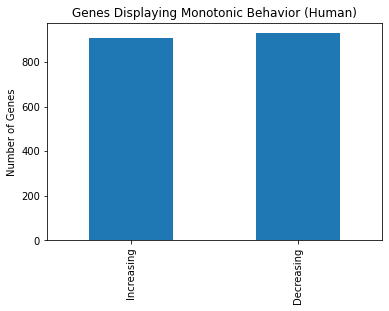

In [87]:
mono_df = pd.DataFrame.from_dict(mono_dict, orient ='index')
mono_df.plot(kind = 'bar', title = 'Genes Displaying Monotonic Behavior (Human)',legend=False)
plt.ylabel('Number of Genes')

In [23]:
MEAN_DF = H_MEAN_DF
AGE_DF = H_AGE_DF
data_x = AGE_DF['AGE (YEARS)']
data_y = AGE_DF['mlxip']
inter = data_y.to_numpy()

for x in range(len(inter)):
    inter[x] = np.log2(inter[x] + 1)
inter = inter.reshape(-1,1)
qtf = QuantileTransformer(output_distribution='normal')
test = qtf.fit_transform(inter)
test

/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (143). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[ 0.89042181],
       [ 0.89042181],
       [ 0.89042181],
       [ 0.89042181],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [-1.80918327],
       [-0.39866394],
       [ 0.89042181],
       [ 0.89042181],
       [-0.39866394],
       [ 0.89042181],
       [-0.39866394],
       [-0.39866394],
       [ 0.89042181],
       [-0.39866394],
       [ 0.89042181],
       [ 0.89042181],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [ 0.89042181],
       [-0.39866394],
       [-0.39866394],
       [ 0.89042181],
       [ 0.89042181],
       [-0.39866394],
       [ 0.89042181],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [ 0.89042181],
       [ 0.89042181],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [-1.80918327],
       [-1.80918327],
       [-0.39866394],
       [-0.39866394],
       [-0.39866394],
       [-1

In [28]:
bruh_df = H_AGE_DF.drop(['AGE (YEARS)', 'Unnamed: 0', 'Unnamed: 0.1', 'GSMS'], axis = 1)

In [27]:
H_AGE_DF

,Unnamed: 0,Unnamed: 0.1,a1bg,a1cf,a2m,a2ml1,a2mp1,a3galt2,a4galt,a4gnt,...,bp-2168n6.1,bp-2168n6.3,bp-2171c21.2,bp-2171c21.4,bp-2171c21.5,bp-2171c21.6,bp-2189o9.2,yr211f11.2,GSMS,AGE (YEARS)
0,0,0,160,1,118,3,0,0,337,4,...,0,0,1,0,0,1,9,0,GSM3124560,1.000000
1,1,1,174,5,67,1,0,0,216,2,...,0,0,0,0,0,1,7,0,GSM3124561,12.000000
2,2,2,218,2,44,2,0,0,525,6,...,0,0,0,0,0,0,0,0,GSM3124562,24.000000
3,3,3,151,5,120,4,1,0,468,0,...,0,0,0,0,0,0,1,0,GSM3124563,25.000000
4,4,4,119,2,45,2,0,0,482,13,...,0,0,0,0,0,0,9,0,GSM3124564,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,138,155,2,160,1,0,0,547,3,...,0,0,0,1,0,7,13,0,GSM3124579,8.500000
139,139,139,209,1,185,1,0,0,867,0,...,0,0,0,2,0,3,7,0,GSM3124580,6.916667
140,140,140,227,0,239,7,0,1,469,1,...,0,0,0,0,0,5,0,0,GSM3124581,5.000000
141,141,141,100,0,6,2,0,0,295,0,...,0,0,0,0,0,0,2,0,GSM3124582,8.833333


In [30]:
normeddf = quantile_normalize(interdf)
normeddf['AGE (YEARS)'] = H_AGE_DF['AGE (YEARS)']
normmeans = normeddf.groupby('AGE (YEARS)').mean().reset_index()

In [66]:
normeddf.groupby('AGE (YEARS)').mean().reset_index()

,AGE (YEARS),a1bg,a1cf,a2m,a2ml1,a2mp1,a3galt2,a4galt,a4gnt,aaas,...,bp-21201h5.1,bp-21264c1.1,bp-2168n6.1,bp-2168n6.3,bp-2171c21.2,bp-2171c21.4,bp-2171c21.5,bp-2171c21.6,bp-2189o9.2,yr211f11.2
0,1.00,3.696043,3.469765,3.737066,3.434647,2.107159,2.107159,3.456468,3.666528,3.524382,...,3.389784,2.826956,2.107159,2.107159,3.031453,2.107159,2.107159,3.240996,3.511080,2.107159
1,2.00,3.596424,3.490542,3.828507,3.579626,2.107159,2.107159,3.196504,4.137915,3.141192,...,3.405513,4.025856,2.107159,2.107159,2.107159,2.107159,2.107159,3.240996,4.112953,2.107159
2,2.25,3.351975,3.169442,3.070065,3.289668,2.107159,2.107159,4.137915,3.562969,3.420721,...,3.482440,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159
3,3.00,3.286503,3.122596,3.685366,3.095774,2.793316,2.107159,3.097744,3.272371,3.140215,...,3.290946,2.861103,2.107159,2.107159,2.107159,2.107159,2.107159,2.723355,2.539944,2.107159
4,3.75,3.506273,3.490542,2.913434,3.289668,2.107159,2.107159,3.490542,3.281306,3.344165,...,3.538272,3.131985,2.107159,2.107159,2.107159,2.107159,2.107159,3.240996,2.107159,2.107159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,90.00,3.850442,3.329992,4.138948,3.144248,2.107159,2.107159,3.906524,4.011653,3.180718,...,3.605542,2.897068,2.107159,2.107159,3.031453,3.122537,2.107159,3.733226,3.305861,2.107159
70,91.00,3.529830,4.025856,3.101737,3.579626,2.107159,4.296070,3.328892,4.259662,3.621395,...,3.748705,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,3.657510,2.107159
71,92.00,3.973883,3.597649,3.561832,3.582228,3.136394,2.107159,4.206247,4.033079,3.625134,...,3.814404,3.303439,2.107159,2.107159,3.031453,2.107159,2.107159,3.122537,2.974202,3.246226
72,94.00,3.281306,3.490542,3.639452,3.289668,2.107159,2.107159,3.215390,2.107159,3.169442,...,4.338031,4.066798,2.107159,2.107159,2.107159,4.507980,2.107159,4.507980,3.405513,2.107159


In [31]:
normmeans

,AGE (YEARS),a1bg,a1cf,a2m,a2ml1,a2mp1,a3galt2,a4galt,a4gnt,aaas,...,bp-21201h5.1,bp-21264c1.1,bp-2168n6.1,bp-2168n6.3,bp-2171c21.2,bp-2171c21.4,bp-2171c21.5,bp-2171c21.6,bp-2189o9.2,yr211f11.2
0,1.00,3.696043,3.469765,3.737066,3.434647,2.107159,2.107159,3.456468,3.666528,3.524382,...,3.389784,2.826956,2.107159,2.107159,3.031453,2.107159,2.107159,3.240996,3.511080,2.107159
1,2.00,3.596424,3.490542,3.828507,3.579626,2.107159,2.107159,3.196504,4.137915,3.141192,...,3.405513,4.025856,2.107159,2.107159,2.107159,2.107159,2.107159,3.240996,4.112953,2.107159
2,2.25,3.351975,3.169442,3.070065,3.289668,2.107159,2.107159,4.137915,3.562969,3.420721,...,3.482440,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159
3,3.00,3.286503,3.122596,3.685366,3.095774,2.793316,2.107159,3.097744,3.272371,3.140215,...,3.290946,2.861103,2.107159,2.107159,2.107159,2.107159,2.107159,2.723355,2.539944,2.107159
4,3.75,3.506273,3.490542,2.913434,3.289668,2.107159,2.107159,3.490542,3.281306,3.344165,...,3.538272,3.131985,2.107159,2.107159,2.107159,2.107159,2.107159,3.240996,2.107159,2.107159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,90.00,3.850442,3.329992,4.138948,3.144248,2.107159,2.107159,3.906524,4.011653,3.180718,...,3.605542,2.897068,2.107159,2.107159,3.031453,3.122537,2.107159,3.733226,3.305861,2.107159
70,91.00,3.529830,4.025856,3.101737,3.579626,2.107159,4.296070,3.328892,4.259662,3.621395,...,3.748705,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,2.107159,3.657510,2.107159
71,92.00,3.973883,3.597649,3.561832,3.582228,3.136394,2.107159,4.206247,4.033079,3.625134,...,3.814404,3.303439,2.107159,2.107159,3.031453,2.107159,2.107159,3.122537,2.974202,3.246226
72,94.00,3.281306,3.490542,3.639452,3.289668,2.107159,2.107159,3.215390,2.107159,3.169442,...,4.338031,4.066798,2.107159,2.107159,2.107159,4.507980,2.107159,4.507980,3.405513,2.107159


In [29]:
interdf = bruh_df.apply(lambda x: np.log2(x + 1))

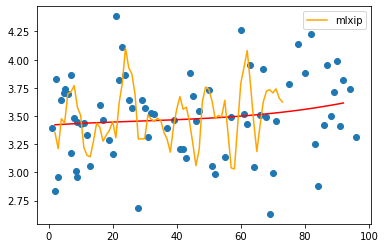

In [75]:
data_x = normmeans['AGE (YEARS)']
data_y = normmeans['mlxip']

train_x, valid_x, train_y, valid_y = train_test_split(data_x,data_y,test_size=0.33)
weights = np.polyfit(train_x,train_y,3)
model = np.poly1d(weights)
xp = np.linspace(valid_x.min(),valid_x.max())
pred = model(valid_x)
pred_plot = model(xp)

plt.scatter(data_x, data_y)
plt.plot(xp,pred_plot, color = 'red')
rolling_mean = normmeans.rolling(window=3).mean()
rolling_mean['mlxip'].plot(legend=True,color='orange' )


In [77]:
M_AGE_DF

,Unnamed: 0,Unnamed: 0.1,0610007p14rik,0610009b22rik,0610009l18rik,0610009o20rik,0610010f05rik,0610010k14rik,0610011f06rik,0610012g03rik,...,mt-co3,mt-cytb,mt-nd1,mt-nd2,mt-nd3,mt-nd4,mt-nd4l,mt-nd5,mt-nd6,age
0,0,0,2888,821,11,1855,446,389,5540,1152,...,426874,406779,206507,257069,8643,276389,33964,207686,67645,38.0
1,1,1,326,237,15,558,948,348,176,494,...,166457,67231,66546,43705,10887,68987,8146,52952,17932,22.0
2,2,2,785,631,48,2953,838,1604,741,809,...,184283,146689,105812,75032,16370,126149,17116,83797,25463,22.0
3,3,3,27,41,34,293,256,27,33,134,...,109902,45754,49335,45978,1879,57024,11139,31842,12539,22.0
4,4,4,620,460,36,2554,622,1691,414,661,...,97139,78078,50646,35025,8226,60702,8038,37361,11734,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1329,5995,612,263,85,969,1172,370,437,506,...,34940,22687,20600,5903,2983,9896,882,4856,1137,12.0
1330,1330,5996,551,289,70,1106,1272,394,400,568,...,36482,24289,21047,5815,2865,10264,842,5400,1399,12.0
1331,1331,5997,568,188,47,947,1387,257,290,429,...,27139,17992,16702,3635,1884,7743,595,4177,877,12.0
1332,1332,5998,325,77,18,380,524,170,145,295,...,19316,13537,10951,5540,1035,7503,1033,7049,2524,12.0


In [16]:
bruh_2 = M_AGE_DF.drop(['Unnamed: 0', 'Unnamed: 0.1', 'age'], axis = 1)

In [17]:
inter2 = bruh_2.apply(lambda x: np.log2(x+1))

In [18]:
mousenorms = quantile_normalize(inter2)

In [19]:
mousenorms['AGE'] = M_AGE_DF['age']

In [20]:
mousemeans = mousenorms.groupby('AGE').mean().reset_index()

Done


Text(0, 0.5, 'Number of Genes')

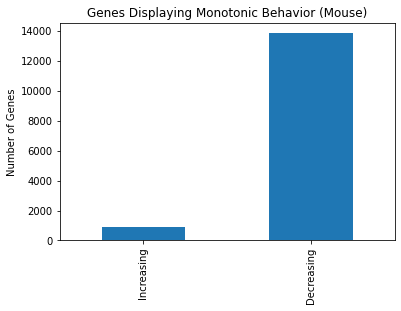

In [23]:
from scipy.stats import spearmanr
spearman_matrix_coef = []
spearman_matrix_p = []

significant_genes = []
for x in mousenorms.columns:
    if x == 'AGE':
        continue
    coef , p = spearmanr(mousenorms[x],mousenorms['AGE'])
    if p < 0.01:
        spearman_matrix_coef.append(coef)
        spearman_matrix_p.append(p)
        significant_genes.append(x)
    else:
        continue

print('Done')
mono_dict = {'Increasing':0, 'Decreasing':0}
for x in spearman_matrix_coef:
    if x > 0:
        mono_dict['Increasing'] += 1
    elif x < 0:
        mono_dict['Decreasing'] += 1 
mono_dict

mono_df = pd.DataFrame.from_dict(mono_dict, orient ='index')
mono_df.plot(kind = 'bar', title = 'Genes Displaying Monotonic Behavior (Mouse)',legend=False)
plt.ylabel('Number of Genes')

In [26]:
norm

NameError: name 'normmedmeans' is not defined

## Age-Expression Curve

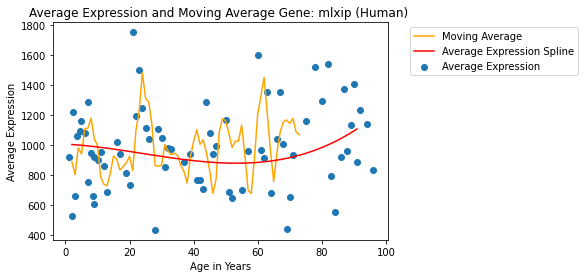

In [12]:
for x in range(1,2):
    MEAN_DF = DFs[x]
    if SP[x] == 'Mouse':
        SPECIES = 'Mouse'
        age = 'age'
    else:
        SPECIES = 'Human'
        age = 'AGE (YEARS)'
    data_x = MEAN_DF[age]
    data_y = MEAN_DF[GENE_INPUT.lower()]
        
    train_x, valid_x, train_y, valid_y = train_test_split(data_x,data_y,test_size=0.33)
    weights = np.polyfit(train_x,train_y,3)
    model = np.poly1d(weights)
    xp = np.linspace(valid_x.min(),valid_x.max())
    pred = model(valid_x)
    pred_plot = model(xp)

    rolling_mean = MEAN_DF.rolling(window=3).mean()

    
    fig, ax = plt.subplots()
    plt.scatter(MEAN_DF[age], MEAN_DF[GENE_INPUT.lower()])
    
    rolling_mean[GENE_INPUT.lower()].plot(legend=True,color='orange' )
    
    plt.plot(xp,pred_plot, color = 'red')
    if SP[x] == 'Mouse':
        plt.xlabel('Age in Weeks')
    else:
        plt.xlabel('Age in Years')
    plt.ylabel('Average Expression')
    plt.title(f'Average Expression and Moving Average Gene: {GENE_INPUT} ({SPECIES}) ')
    label = ['Moving Average', 'Average Expression Spline', 'Average Expression']
    plt.legend(label, bbox_to_anchor=(1.05,1.0))
    
    if DOWNLOAD_PLOT:
        plt.savefig(f'GenePlot{GENE_INPUT}.png')
    plt.show()


## PCA for the Dataset

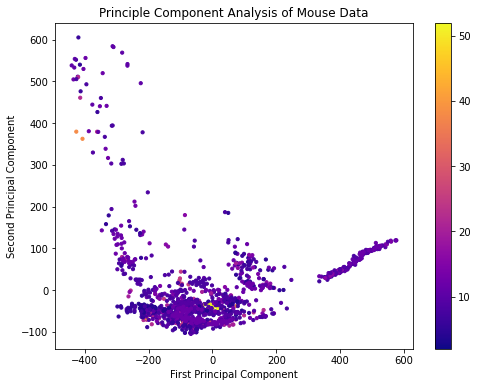

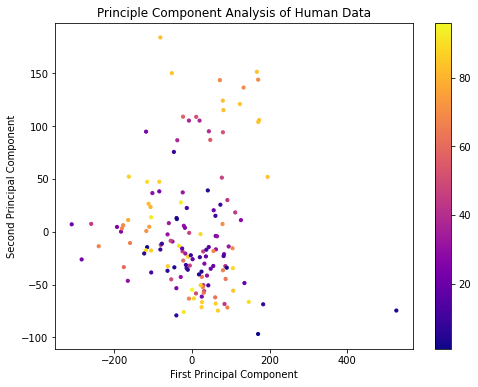

In [59]:
if INCLUDE_PCA == False:
    PCA_COMPS = []
    PCAs = []
    PCA_DFs = []
    xpcas = []
    normtrans_data = []
    for x in range(len(DFs)):
        if SP[x] =='Human':
            age = 'AGE (YEARS)'
            PCA_DF = AGE_DF = H_AGE_DF
            curr_sp = 'Human'
        else:
            age = 'age'
            PCA_DF = AGE_DF = M_AGE_DF
            curr_sp = 'Mouse'
        PCA_DFs.append(PCA_DF)
        data = PCA_DF.to_numpy()
        for x in range(len(data)):
            for y in range(len(data[x])):
                data[x][y] = np.log2(data[x][y] + 1)


        trans1 = pd.DataFrame(data)

        pca = PCA(n_components = 2)
        qt = QuantileTransformer(n_quantiles=AGE_DF.shape[0],output_distribution='normal')

        data_trans = qt.fit_transform(trans1)
        normtrans_data.append(data_trans)
        pca.fit(data_trans)
        x_pca = pca.transform(data_trans)
    
        xpcas.append(x_pca)
    
        PCA_COMPS.append(pca.components_)
        PCAs.append(pca)
        plt.figure(figsize=(8,6))
        plt.scatter(x_pca[:,0], x_pca[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title(f'Principle Component Analysis of {curr_sp} Data')
        plt.colorbar()
        if DOWNLOAD_PCA:
            plt.savefig(f'PCA{GENE_INPUT}.png')
        plt.show()
       

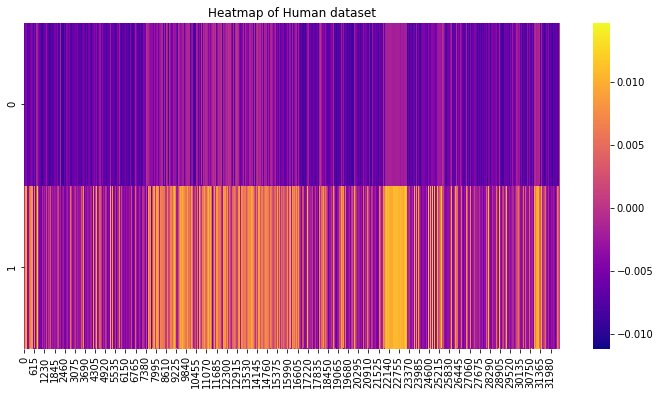

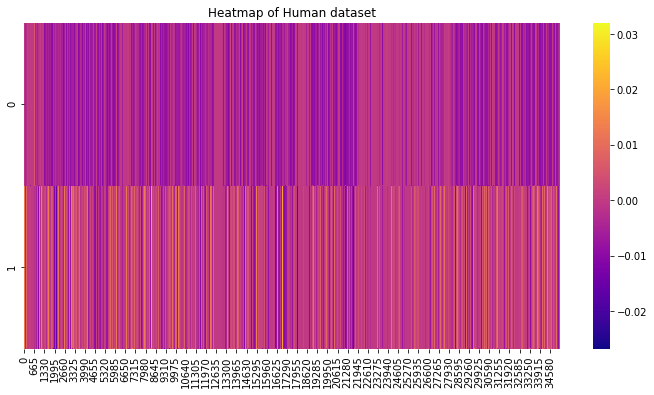

In [61]:
if INCLUDE_PCA:
    for x in range(len(PCA_COMPS)):
        df_comp_s = pd.DataFrame(PCA_COMPS[x])
        plt.figure(figsize=(12,6))
        plt.xlabel('Genes')
        plt.ylabel('Principal Components')
        plt.title(f'Heatmap of {SP[x]} dataset')
        sns.heatmap(df_comp_s, cmap='plasma')

## T-SNE for the Dataset

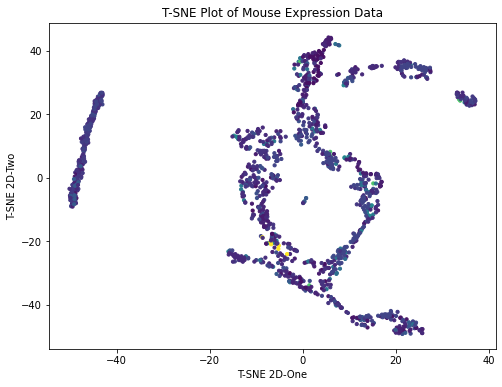

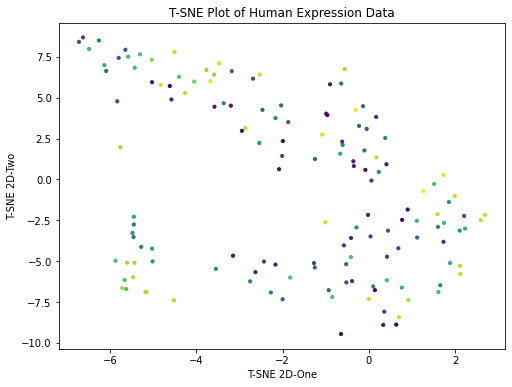

In [35]:
if INCLUDE_TSNE:
    for x in range(len(DFs)):
        if SP[x] == 'Human':
            age = 'AGE (YEARS)'
        else:
            age = 'age'
        AGE_DF = AGE_DFs[x]
        tsne = TSNE(n_components=2, perplexity=35, learning_rate=250)
    
        pca_df = pd.DataFrame(xpcas[x])
        tsne_results = tsne.fit_transform(pca_df)

        plt.figure(figsize=(8,6))
        plt.scatter(tsne_results[:,0], tsne_results[:,1],c=AGE_DF[age], cmap = color_dict[str(GRAPH_COLOR)], s = 10)
        plt.xlabel('T-SNE 2D-One')
        plt.ylabel('T-SNE 2D-Two')
        plt.title(f'T-SNE Plot of {SP[x]} Expression Data')
        plt.colorbar()
        if DOWNLOAD_TSNE:
            plt.savefig(f't-SNE{GENE_INPUT}.png')
        plt.show()

        

## Batch Effect Removal with PyCombat

/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/pycombat/pycombat.py:157: RuntimeWarning: divide by zero encountered in true_divide
  (abs(del_sq_post - del_sq_prior) / del_sq_prior).max())
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/swolegorrilla/app-gene-appyter/venv/lib/python3.7/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


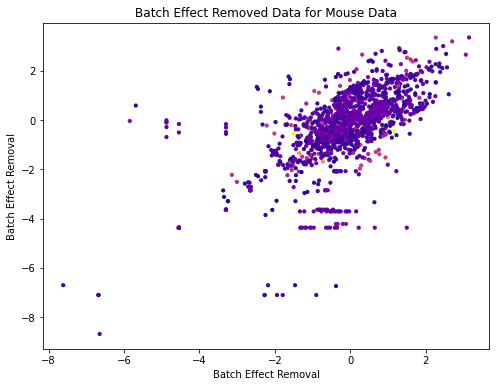

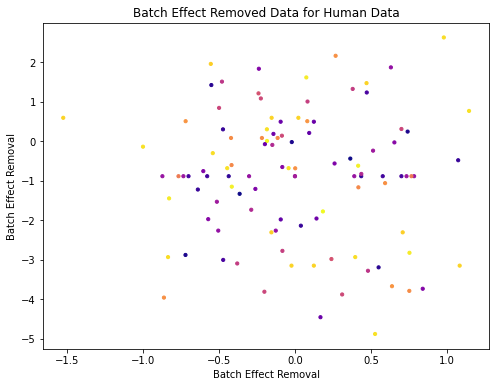

In [45]:
if INCLUDE_COMBAT:
    for x in range(2):
        if SP[x] == 'Human':
            DTDF = normtrans_data[1]
            curr_sp = 'Human'
            age = 'AGE (YEARS)'
            AGE_DF = AGE_DFs[1]
        else:
            DTDF = normtrans_data[0]
            curr_sp = 'Mouse'
            age = 'age'
            AGE_DF = AGE_DFs[0]
        combat = Combat()
        c_dat = combat.fit_transform(DTDF[:,:len(DTDF[0])-1],DTDF[:,len(DTDF[0])-1])

        plt.figure(figsize=(8,6))
        plt.scatter(c_dat[:,0], c_dat[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
        plt.xlabel('Batch Effect Removal')
        plt.ylabel('Batch Effect Removal')
        plt.title(f'Batch Effect Removed Data for {curr_sp} Data')
        plt.colorbar()
        if DOWNLOAD_COMBAT_DATA:
            plt.savefig(f'Combat Data{GENE_INPUT}.png')
        plt.show()

## UMAP Plot

In [1]:
if INCLUDE_UMAP:
    for x in range(2):
        if SP[x] == 'Human':
                DTDF = normtrans_data[1]
                curr_sp = 'Human'
                age = 'AGE (YEARS)'
                AGE_DF = AGE_DFs[1]
        else:
                DTDF = normtrans_data[0]
                curr_sp = 'Mouse'
                age = 'age'
                AGE_DF = AGE_DFs[0]
        reducer = umap.UMAP()

        embedding = reducer.fit_transform(DTDF)

        plt.figure(figsize=(8,6))
        plt.scatter(embedding[:,0], embedding[:,1],c=AGE_DF[age], cmap = 'plasma', s = 10)
        plt.title(f'UMAP Plot of {curr_sp} Age Data')
        plt.xlabel('UMAP First Component')
        plt.ylabel('UMAP Second Component')
        plt.colorbar()
        if DOWNLOAD_UMAP:
            plt.savefig(f'UMAP{GENE_INPUT}.png')
        plt.show()


NameError: name 'INCLUDE_UMAP' is not defined